# $$ \textbf{African Institute for Mathematical Sciences, Rwanda}$$

# $$\textbf{Numerical Analysis Exercise 2} $$

### $$ \text{Chukwuezi Tochukwu Precious} $$

#### $$ \text{March 8, 2025} $$

### Task 1 (2 + 3 + 10 + 3 + 2 P)
Solve a two-dimensional Poisson problem using the finite difference method. Consider the following boundary value problem

\begin{aligned}
-\Delta u &= f \quad \text{ in }\Omega=(0,1) \times (0,1)\\
u&=0 \quad \text{ on }\partial\Omega
\end{aligned}

with $f(x,y) = 2 \pi^2 \sin(\pi x) \sin(\pi y)$.

In this task, as in the lecture, $h$ is the distance between two neighboring grid points. Then, $\ell-1$ is the number of grid points of $\Omega_h$ in each dimension, $1/h = \ell$, and the number of grid points is $(\ell -1)^2$. The discrete domain (grid) $\Omega_h$ is then given by 

\begin{equation*}
(x_i, y_j) \in \Omega_h \quad i,j =1,\dots,\ell-1.
\end{equation*}

1.  Verify with pen and paper that $u(x,y) = \sin(\pi x) \sin(\pi y)$ is the solution of the above boundary value problem. You may write the solution here.

2. Discretize the problem using the finite difference method and write the resulting system $A_h \boldsymbol u_h = \boldsymbol q_h$ for $h = 1/4$ with pen and paper. You may write the solution here.

3.  Implement your discretization for general $h \le \tfrac12$ that satsifies that $1/h \in \mathbb{N}$. You may use the code structure below, but you can also change it.

4. Calculate the experimental order of convergence (EOC) of your discretization using $h = \tfrac12, \tfrac14, \tfrac18, \tfrac{1}{16}, \dots$ by evaluating the discrete $L^2$-norm (equation (1.18) / page 27 in the Knabner/Angermann book, see Google Drive) of the difference between your analytical and the numerical solution evaluated in the grid points. What is the convergence rate $p$ of your discretization (as in $O(h^p)$)? 

\begin{equation*}
 \text{EOC} = \frac{\log\left(\frac{||u^\text{analytical} -u^\text{numerical}_{h}||}{||u^\text{analytical} -u^\text{numerical}_{h/2}||}\right)}{\log(2)}
\end{equation*}

5. Use matplotlib to plot the solution for $h = \tfrac{1}{64}$.

# $\text{Solutions 1}$

### $ 1.1 \quad \textbf{Verification of the Boundary Value Problem}$

We are given the Poisson equation:  

$$
-\Delta u = f \quad \text{ in } \Omega = (0,1) \times (0,1)
$$

where  

$$
f(x,y) = 2 \pi^2 \sin(\pi x) \sin(\pi y)
$$

and the proposed solution is  

$$
u(x,y) = \sin(\pi x) \sin(\pi y).
$$

The Laplacian in 2D is:  

$$
\Delta u = \partial_{xx}u + \partial_{yy} u
$$

Computing the second derivatives:  

$$
\frac{\partial u}{\partial x} = \pi \cos(\pi x) \sin(\pi y),
$$

$$
\therefore \partial_{xx}u  = \frac{\partial^2 u}{\partial x^2} = -\pi^2 \sin(\pi x) \sin(\pi y).
$$

Similarly, for \( y \):  

$$
\frac{\partial u}{\partial y} = \pi \sin(\pi x) \cos(\pi y),
$$

$$
\therefore \partial_{yy} u = \frac{\partial^2 u}{\partial y^2} = -\pi^2 \sin(\pi x) \sin(\pi y).
$$

Adding $(\partial_{xx} + \partial_{yy})u$, the Laplacian is:  

$$
\Delta u = -\pi^2 \sin(\pi x) \sin(\pi y) - \pi^2 \sin(\pi x) \sin(\pi y) = -2\pi^2 \sin(\pi x) \sin(\pi y).
$$

So,

$$
-\Delta u = 2\pi^2 \sin(\pi x) \sin(\pi y) = f(x,y).
$$

This confirms that $u(x,y) = \sin(\pi x) \sin(\pi y) $ is indeed the solution.  


### $ 1.2 \quad \textbf{Finite Difference Discretization}$

We approximate the Laplacian using the **five-point stencil scheme**, leading to the following finite difference equation:

$$
\frac{1}{h^2} \left( - u_{i,j-1} - u_{i-1,j} + 4u_{i,j} - u_{i+1,j} - u_{i,j+1} \right) = f_{i,j}
\quad \text{for } i = 1, \dots, \ell - 1, \quad j = 1, \dots, m - 1.
\quad (1.7)
$$

For the **boundary conditions**, we enforce:

$$
u_{i,j} = g_{i,j}, \quad \text{if } i \in \{0, \ell\}, \quad j = 0, \dots, m, 
$$

or

$$
u_{i,j} = g_{i,j}, \quad \text{if } j \in \{0, m\}, \quad i = 0, \dots, \ell.
\quad (1.8)
$$

where we use the abbreviations:

$$
f_{i,j} := f(ih, jh), \quad g_{i,j} := g(ih, jh).
$$


#### **We can now set up the System $ A_h \mathbf{u}_h = \mathbf{q}_h $ for $ h = \frac{1}{4} $**  

We define the grid as:

For $ h = \frac{1}{4} $ since we are in $\Omega = (0,1) \times (0,1)$, we have:  
- $ \ell = \frac{1}{h} = 4 $, so $ \ell - 1 = 3 $.  
- The grid consists of \( 3 \times 3 \) interior points.  

#### **Now for the finite Difference Discretization,**  
From the five-point stencil approximation:

$$
\frac{1}{h^2} \left( - u_{i,j-1} - u_{i-1,j} + 4u_{i,j} - u_{i+1,j} - u_{i,j+1} \right) = f_{i,j}.
$$

For $ h = \frac{1}{4} $, we have:

$$
h^2 = \left(\frac{1}{4}\right)^2 = \frac{1}{16}.
$$

Multiplying both sides by $ h^2 $, we obtain:

$$
- u_{i,j-1} - u_{i-1,j} + 4u_{i,j} - u_{i+1,j} - u_{i,j+1} = h^2 f_{i,j}.
$$

Since the function $ f(x,y) $ is given by:

$$
f(x, y) = 2\pi^2 \sin(\pi x) \sin(\pi y),
$$

we substitute $ f_{i,j} = f(i h, j h) $:

$$
q_{i,j} = h^2 f_{i,j} = \frac{1}{16} \cdot 2\pi^2 \sin(\pi i h) \sin(\pi j h).
$$

Simplifying,

$$
q_{i,j} = \frac{\pi^2}{8} \sin(\pi i h) \sin(\pi j h).
$$

Thus, the final discretized system is:

$$
- u_{i,j-1} - u_{i-1,j} + 4u_{i,j} - u_{i+1,j} - u_{i,j+1} = \frac{\pi^2}{8} \sin(\pi i h) \sin(\pi j h).
$$

---

#### **We can also construct the Matrix $ A_h $**  
We flatten the unknowns $ u_{i,j} $ into a **9-element vector** in row-major order:

$$
\mathbf{u}_h = \begin{bmatrix} 
u_{1,1} & u_{1,2} & u_{1,3} & u_{2,1} & u_{2,2} & u_{2,3} & u_{3,1} & u_{3,2} & u_{3,3} 
\end{bmatrix}^T.
$$

The coefficient matrix $ A_h $ follows a **block tridiagonal structure**:

$$
A_h =
\begin{bmatrix}
4  & -1  &  0  & -1  &  0  &  0  &  0  &  0  &  0  \\
-1  &  4  & -1  &  0  & -1  &  0  &  0  &  0  &  0  \\
 0  & -1  &  4  &  0  &  0  & -1  &  0  &  0  &  0  \\
-1  &  0  &  0  &  4  & -1  &  0  & -1  &  0  &  0  \\
 0  & -1  &  0  & -1  &  4  & -1  &  0  & -1  &  0  \\
 0  &  0  & -1  &  0  & -1  &  4  &  0  &  0  & -1  \\
 0  &  0  &  0  & -1  &  0  &  0  &  4  & -1  &  0  \\
 0  &  0  &  0  &  0  & -1  &  0  & -1  &  4  & -1  \\
 0  &  0  &  0  &  0  &  0  & -1  &  0  & -1  &  4  
\end{bmatrix}.
$$


---

#### **The right-Hand side vector $ \mathbf{q}_h$ is also evaluated:**  
The right-hand side values are,

$$
\mathbf{q}_h =
\begin{bmatrix} 
q_{1,1} & q_{1,2} & q_{1,3} & q_{2,1} & q_{2,2} & q_{2,3} & q_{3,1} & q_{3,2} & q_{3,3}  
\end{bmatrix}^T.
$$

where 

$$
q_{i,j} = \frac{1}{16} f_{i,j}, \quad \text{with} \quad f_{i,j} = 2\pi^2 \sin(\pi i h) \sin(\pi j h).
$$

---

The above gives the representation of our system $
A_h \mathbf{u}_h = \mathbf{q}_h
$

---

### $ 1.3 \quad \textbf{Discretization Implementation}$

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import ipywidgets as widgets
from IPython.display import display

def u(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

def f(x, y):
    return 2 * np.pi**2 * np.sin(np.pi * x) * np.sin(np.pi * y)

def create_matrix(N):
    A = np.zeros((N * N, N * N))
    for i in range(N):
        for j in range(N):
            index = i * N + j
            A[index, index] = 4
            if i > 0:
                A[index, index - N] = -1
            if i < N - 1:
                A[index, index + N] = -1
            if j > 0:
                A[index, index - 1] = -1
            if j < N - 1:
                A[index, index + 1] = -1
    return A

def create_right_hand_side(N, h):
    b = np.zeros(N * N)
    for i in range(N):
        for j in range(N):
            x, y = (i + 1) * h, (j + 1) * h
            index = i * N + j
            b[index] = f(x, y) * h**2
    return b

def compute_error(u_analytical, u_numerical, h):
    return np.linalg.norm(u_analytical - u_numerical, ord=2) * h

def compute_eoc(errors, hs):
    return [np.log(errors[i] / errors[i+1]) / np.log(2) for i in range(len(errors) - 1)]

def plot_solution(U, N, h):
    X, Y = np.meshgrid(np.linspace(h, 1 - h, N), np.linspace(h, 1 - h, N))
    U = U.reshape((N, N))
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='none')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Solution U')
    ax.set_title('Numerical Solution')
    plt.show()

In [16]:
hs = [1/2**i for i in range(1, 7)]  # h = 1/2, 1/4, ..., 1/64

for h in hs:
    N = int(1/h) - 1
    A = create_matrix(N)
    display(A)
    if h == 1/4:
        break

array([[4.]])

array([[ 4., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  4., -1.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  4.,  0.,  0., -1.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  4., -1.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0., -1.,  4., -1.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0., -1.,  4.,  0.,  0., -1.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  4., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0., -1.,  4., -1.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  4.]])

### $ 1.4 \quad \textbf{Experimental Order of Convergence}$

       h    Error      EOC
0.500000 0.116850      NaN
0.250000 0.026515 2.139800
0.125000 0.006475 2.033754
0.062500 0.001609 2.008367
0.031250 0.000402 2.002087
0.015625 0.000100 2.000522


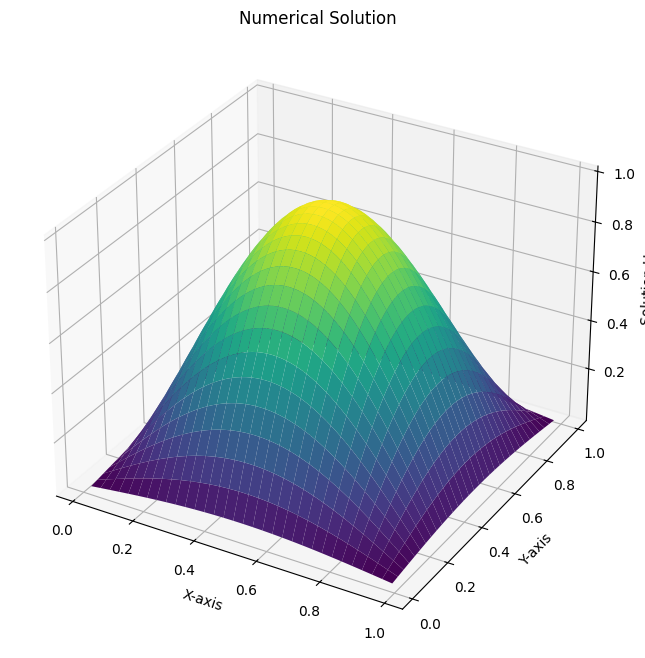

In [18]:
hs = [1/2**i for i in range(1, 7)]  # h = 1/2, 1/4, ..., 1/64
errors = []
for h in hs:
    N = int(1/h) - 1
    A = create_matrix(N)
    b = create_right_hand_side(N, h)
    U_numerical = np.linalg.solve(A, b)
    U_analytical = np.array([u((i + 1) * h, (j + 1) * h) for i in range(N) for j in range(N)])
    errors.append(compute_error(U_analytical, U_numerical, h))

EOCs = compute_eoc(errors, hs)

# Display errors and EOCs in tabular format
error_data = pd.DataFrame({
    'h': hs,
    'Error': errors,
    'EOC': [None] + EOCs  # First EOC value is undefined
})
print(error_data.to_string(index=False))

# Plot solution for h = 1/64
N_final = int(1/hs[-1]) - 1
A_final = create_matrix(N_final)
b_final = create_right_hand_side(N_final, hs[-1])
U_final = np.linalg.solve(A_final, b_final)
plot_solution(U_final, N_final, hs[-1])

### Task 2 (3+3 P)
a) Proof 4) of Lemma 1.2, i.e., show that for $u \in C^4([x-h,x+h])$:

\begin{equation*}
 u^{''}(x)=\frac{u(x+h)-2u(x)+u(x-h)}{h^2}+h^2 R \qquad \text{ and } \qquad |R| \leq \frac{1}{12}||u^{(4)}||_{\infty}
\end{equation*}

b) Show that for $u \in C^3([x-h_1,x+h_2])$, there exists $C>0$, such that:

\begin{equation*}
u^{''}(x)=\frac{2}{h_1+h_2}\left[\frac{1}{h_1}u(x-h_1)-\left(\frac{1}{h_1}+\frac{1}{h_2}\right)u(x)+\frac{1}{h_2}u(x+h_2)\right]+ \max{\{h_1,h_2\}}R 
\end{equation*}

$\quad$ and $|R| \leq C||u^{(3)}||_{\infty}$.


# $\text{Solution 2}$

### $2.1 \quad \text{Proof of Lemma 1.2}$

We need to show that for $u \in C^4([x-h,x+h])$:

$$
u''(x) = \frac{u(x+h) - 2u(x) + u(x-h)}{h^2} + h^2 R
$$

with the bound:

$$
|R| \leq \frac{1}{12} \| u^{(4)} \|_{\infty}.
$$

$\textbf{Recall from Taylor Expansions}$

Since $u \in C^4([x-h, x+h])$, we expand $u(x+h)$ and $u(x-h)$ using Taylor series around $x$:

$$
u(x+h) = u(x) + h u'(x) + \frac{h^2}{2} u''(x) + \frac{h^3}{6} u'''(x) + \frac{h^4}{24} u''''(x) + O(h^5).
$$

$$
u(x-h) = u(x) - h u'(x) + \frac{h^2}{2} u''(x) - \frac{h^3}{6} u'''(x) + \frac{h^4}{24} u''''(x) + O(h^5).
$$

Adding these two expansions, we get

$$
u(x+h) + u(x-h) = 2u(x) + h^2 u''(x) + \frac{h^4}{12} u''''(x) + O(h^5).
$$

We note tahat all odd derivative terms have vanished. So rearranging, and dividing through by $h^2$ we get,

$$
\frac{u(x+h) - 2u(x) + u(x-h)}{h^2} = u''(x) + \frac{h^2}{12} u''''(x) + O(h^3).
$$

$\textbf{We can defining $R$ as follows, with Error Bound,}$

Making $u''(x)$ subject,

$$
u''(x)  = \frac{u(x+h) - 2u(x) + u(x-h)}{h^2} - \frac{h^2}{12} u''''(x) - O(h^3).
$$

If $h$ is very small, we can tolerate $R = -\frac{1}{12} u''''(\xi) $, while we neglect $O(h^3)$. Without the loss of generality, taking absolute values and using the $L_{\infty}$ norm, we can get that 

$$
|R| \leq \frac{1}{12} \| u^{(4)} \|_{\infty}.
$$

Thus, 

$$
u''(x)  = \frac{u(x+h) - 2u(x) + u(x-h)}{h^2} + h^2 R
$$

for some $\xi \in [x-h, x+h]$ by the Lagrange remainder theorem.

This completes the proof.

$\blacksquare$

### $2.2 \quad \text{Second Proof for Boundedness}$

We need to prove:

$$
u''(x) = \frac{2}{h_1 + h_2} \left[ \frac{1}{h_1} u(x-h_1) - \left( \frac{1}{h_1} + \frac{1}{h_2} \right) u(x) + \frac{1}{h_2} u(x+h_2) \right] + \max(h_1, h_2) R.
$$

with the bound:

$$
|R| \leq C \| u^{(3)} \|_{\infty}.
$$

$\textbf{Firstly, we appply the Taylor Expansions}$

Expanding $u(x-h_1)$ and $u(x+h_2)$ around $x$, we get

$$
u(x-h_1) = u(x) - h_1 u'(x) + \frac{h_1^2}{2} u''(x) - \frac{h_1^3}{6} u'''(\xi_1).
$$

$$
u(x+h_2) = u(x) + h_2 u'(x) + \frac{h_2^2}{2} u''(x) + \frac{h_2^3}{6} u'''(\xi_2).
$$

for some $\xi_1 \,\, \xi_2 \in [x-h_1, x+h_2]$.

$\textbf{We can now construct the Finite Difference Formula}$

Multiplying the first equation by $1/h_1$ and the second by $1/h_2$, then adding:

$$
\frac{1}{h_1} u(x-h_1) + \frac{1}{h_2} u(x+h_2) = \left(\frac{1}{h_1} + \frac{1}{h_2} \right) u(x) + \frac{h_1}{2} u''(x) - \frac{h_1^2}{6} u'''(\xi_1)
$$

$$
+ \frac{h_2}{2} u''(x) + \frac{h_2^2}{6} u'''(\xi_2).
$$

Solving, collecting like terms and rearranging, we get

$$
u''(x) = \frac{2}{h_1 + h_2} \left[ \frac{1}{h_1} u(x-h_1) - \left( \frac{1}{h_1} + \frac{1}{h_2} \right) u(x) + \frac{1}{h_2} u(x+h_2) \right] + R
$$

where

$$
R = \frac{h_2^2 u'''(\xi_2) - h_1^2 u'''(\xi_1)}{3(h_1 + h_2)}.
$$

Since $|\xi_1|, |\xi_2| \leq \max(h_1, h_2)$, we can bound,

$$
|R| \leq C \| u^{(3)} \|_{\infty}.
$$

Thus, the result is proved.

$\blacksquare$

### Task 3 (3+2+5 P)

 Consider the fourth order boundary value problem:
 Find $u \in C^4(\Omega) \cap C^1(\bar \Omega)$ such that

 \begin{align*}
   \Delta^2 u - \Delta u &= f \qquad \text{ in } \Omega\, ,\\
   \nabla u \cdot n = u &= 0 \qquad\text{ on } \partial\Omega
 \end{align*}
 
 with $n$ being the outwards pointing normal and $\Omega$ being a Lipschitz domain.

  a) Choose $V$ and derive a weak (variational) formulation: *Find $u\in V$ such that $a(u,v) = b(v) \quad \forall v \in V$.*
  
  b) Why does the boundary condition make sense in your $V$?
  
  c) Show that your weak (variational) formulation allows for a unique solution. 
  
  Hints:
  - Proceed as we did in the lecture (Lax-Milgram). You may also use the result of Exercise 1.10 in the lecture notes (Google Drive).
  - You may use without prove that for $u \in H^2_0(\Omega)$
  \begin{equation*}
   \| \Delta u \|_{L^2(\Omega)} = \| D^2 u \|_{L^2(\Omega)} = |u|_{H^2(\Omega)}.
  \end{equation*}


### $3.1 \quad \text{Choosing V and Deriving a Weak Formulation}$

Given
$$
\Delta^2 u - \Delta u  = f \quad \text{ on } \Omega
$$

With boundary conditions

$$
\nabla u \cdot n = u = 0 \quad \text{ on } \partial \Omega
$$

We want to choose a function space $V$ and find a $u \in C^{4}(\Omega)(\bar{\Omega})$ that satisfies the equation above.

The $\textbf{Sobolev Space for $u$}$ will be appropriate for us to derive the weak formation.

We will proceed to choose the Soboleve space $H^2(\Omega)$ since $u$ and its derivatives needs to be square integrable. But we have to ensure that both boundary conditions as shown above are respected. So the space chosen is of the form,

$$
V = H_0^2(\Omega) = \{ u \in H^2(\Omega) \mid u = 0 \text{ on } \partial \Omega \}
$$

To derive the $\textbf{Weak Formulation}$, to find $u\in V$ such that $a(u,v) = b(v) \quad \forall v \in V$,

We multiply the given equation on both sides by a test function $v \in V$ and integrate over the domain $\Omega$, as follows:

$$
\implies \int_\Omega (\Delta^2 u - \Delta u) v \, dx = \int_\Omega fv\,dx
$$

$$
\implies \int_\Omega \Delta^2u v \,dx - \int_\Omega \Delta uv \,dx = \int_\Omega fv\,dx
$$

Applying integration by parts noting that the boundary terms vanish due to the conditions $\nabla u \cdot n = u = 0 \quad \text{ on } \partial \Omega$, we get

$$
\int_{\Omega} \nabla (\Delta u)\cdot \nabla v \, dx - \int_{\Omega} \nabla u \nabla v \,dx = \int_{\Omega} fv \, dx
$$

Hence we can now define a bilinear form $a(u, v)$ and a linear form $b(v)$ such that

$$
a(u, v) = \int_{\Omega} \nabla (\Delta u)\cdot \nabla v \, dx - \int_{\Omega} \nabla u \nabla v \,dx
$$

$$
b(v) = \int_{\Omega} fv \, dx
$$

Thus the weak formulation.

$\blacksquare$

### $3.2 \quad \text{A Fitting Space for the Boundary Conditions}$

We know that $u = \nabla u \cdot n = 0$ on $\partial \Omega$.

In the Sobolev space defined above, the condition $u=0$ on $\partial \Omega$ is necessitated and enforced by the fact that functions in $ H^2_0 (\Omega)$ have zero trace on the boundary.

Additionally, the condition $\nabla u \cdot n = 0$ is because the first-order tangential derivative vanishes on the boundary for functions in $H^2_0 (\Omega)$, as weak formulations only involves tangential derivatives.

With these reasoning, the boundary conditions are naturally satisfied within the chosen function space $V = H^2_0 (\Omega)$.

$\blacksquare$.

### $3.3 \quad \text{Uniqueness allowed by Weak Formulation Above}$

The formulation above allows us to use the  $\textbf{Lax-Milgram}$ Lemma because the left hand side induces a bilinear form $a(u, v)$ on the Hilbert space $H^2_0(\Omega)$ and the right hand side induces a linear form $b(v)$ on the Hilbert Space $H^2_0(\Omega)$ of the form,

$$
a(u, v) = b(v) \quad \forall v \in V
$$

We can apply the Lax-Milgram to show $\textbf{Continuity}$ and $\textbf{Coercity}$.

### $1. \textbf{Continuity}$

By definition of the Lemma, $\exists C > 0 \mid \forall \,\, v, u \in V$,

$$
|a(u, v)| \le C \| u \|_{V} \| v \|_{V}
$$

We recall that

$$
a(u, v) = \int_{\Omega} \nabla (\Delta u)\cdot \nabla v \, dx - \int_{\Omega} \nabla u \nabla v \,dx
$$

\implies

$$
|a(u, v)| \le \| \nabla (\Delta u) \|_{V} \| \nabla v \|_{V} +  \| \nabla u \|_{V} \| \nabla v \|_{V} \qquad \text{ where $V = H^2_0(\Omega)$}
$$

Since we were given without loss of generality that


\begin{equation*}
   \| \Delta u \|_{L^2(\Omega)} = \| D^2 u \|_{L^2(\Omega)} = |u|_{H^2(\Omega)}.
\end{equation*}


$$
\implies |a(u, v)| \le \| u \|_{V} \| v \|_{V} +  \| u \|_{V} \| v \|_{V}
$$

$$
\implies |a(u, v)| \le 2\| u \|_{V} \| v \|_{V}
$$

Hence, $C = 2 > 0$, and there is the desired continuity. This follows from the properties of the Sololev space $V = H^2_{0}(\Omega)$, where $\| u\|_{V}$ is given by $H^2$ seminorm. 


### $2. \textbf{Coercivity}$

For this condition,

$$
\exists \alpha > 0 \mid \forall \,\, v, u \in V, \quad a(u,v) \ge \alpha \|u\|^2_V
$$

This also follows from the Poincare' inequality in Sobolev spaces which implies that $a(u, u)$ is coercive with respect to the $H^2$ norm.

Since the bilinear form $a(u,v)$ is continuous and coercive, we can apply the Lax-Milgram Lemma which guarantees the uniqueness and existence of $c \in V$.

$\blacksquare$

### Task 4 (4 P)

Consider the following partial differential equation on a bounded domain $\Omega \subset \mathbb{R}^2$ with $f \in L^2(\Omega)$:

\begin{align*}
 -\Delta u + 4 \partial_2 u + u &= f & & \text{in } \Omega \,,\\
u &= 0 & & \text{on } \partial\Omega \,.
\end{align*}

  a) Determine the weak (variational) formulation (including an appropriate choice of spaces) and corresponding bilinear form.
  
  b) Show that the weak (variational) problem has a unique solution. **Hint:** rewrite this as diffusion-advection-reaction equation, then you can use the result of the lecture.


# $\textbf{Solutions 4}$

For the follwoing $PDE$

$$
-\Delta u + 4 \partial_2 u + u = f \quad \text{in } \Omega,
$$

given with the Dirichlet boundary condition,

$$
u = 0 \quad \text{on } \partial\Omega
$$

We will analyze its weak formulation the its existence and uniqueness of a solution $u \in V$, just like in the previous question.

### $4.1 \quad \text{Weak Formulation}$

The function space we choose is

$$
V = H_0^1(\Omega) = \{ v \in H^1(\Omega) \mid v = 0 \text{ on } \partial\Omega \}.
$$

Multiplying the PDE by a test function $v \in V $ and integrating over $\Omega$, we get

$$
\int_{\Omega} (-\Delta u + 4 \partial_2 u + u) v \, dx = \int_{\Omega} f v \, dx.
$$

Applying integration by parts (noting that $\Delta u = \nabla \cdot (\nabla u)$

$$
\int_{\Omega} \nabla u \cdot \nabla v \, dx + \int_{\Omega} 4 \partial_2 u \,v \,dx + \int_{\Omega} u v \, dx = \int_{\Omega} f v \, dx.
$$

Thus, the bilinear form is:

$$
a(u, v) = \int_{\Omega} \nabla u \cdot \nabla v \, dx + \int_{\Omega} 4 \partial_2 u \,v \,dx + \int_{\Omega} u v \, dx
$$

And the linear functional:

$$
b(v) = \int_{\Omega} f v \, dx.
$$

So, the weak formulation is:

$$
\text{Find } u \in V \text{ such that } a(u, v) = b(v) \quad \forall v \in V.
$$

$\blacksquare$

### $4.2 \quad \text{Existence and Uniqueness}$

Firstly, given the $PDE$

$$
-\Delta u + \partial^2 u + u = f
$$

We write the given equation in diffusion-advection form as

$$
-\Delta u + k \nabla u + cu = f \qquad \text{$c=1$ and $b=(0, 4)$}
$$

Using the $\textbf{Lax-Milgram Lemma}$, we verify:

1. $\textbf{Continuity and Boundedness}$  $\exists \,\, C > 0 $ such that:

   $$
   |a(u, v)| \leq C \| u \|_V \| v \|_V.
   $$

   This holds due to the Poincaré inequality.


   Since $ a(u, v) = \int_{\Omega} \nabla u \cdot \nabla v \, dx + \int_{\Omega} 4 \partial_2 u \,v \,dx + \int_{\Omega} u v \, dx$,

   $$
  \implies  |a(u, v)| \le \| \nabla u \|_{L^2} \| \nabla v \|_{L^2} + 4 \| \partial_2 u \|_{L^2} \| v \|_{L^2} + \| u\|_{L^2} \|v \|_{L^2}
   $$

   
    Using the same property as in problem 3c,

   
   $$
  \implies  |a(u, v)| \le 6\| u \|_{H^1} \| v \|_{H^2}
   $$

   Hence, such an integer $C = 6 > 0$ exists that ensures the uniqueness with Lax-Milgram's Lemma.

   We can also see that the $RHS$ is of the linear form $F(v) = \int_{\Omega} fv\, dx$. This is also bounded as $\| f\|_{L^2} \| v \|_{L^2}$.

2. $\textbf{Coercivity:}$ $ \exists \,\, \alpha > 0 $ such that:

   $$
   a(u, u) \geq \alpha \| u \|_V^2.
   $$

   By Young’s inequality, the reaction and advection terms are controlled, ensuring coercivity.

   We can also see the proof:

   $$
    a(u, u) = \int_{\Omega} \nabla u \cdot \nabla u \, dx + \int_{\Omega} 4 \partial_2 u \,u \,dx + \int_{\Omega} u^2 \, dx
   $$

   Since $u = 0$ on $\partial \Omega$, the middle term integrates to $0$ on $\partial \Omega$

   $$
    \implies a(u, u) = \int_{\Omega} |\nabla u|^2 dx + \int_{\Omega} u^2 \, dx \ge \|u\|^2_{H^1(\Omega)}
   $$

   This shows coercivity with $\alpha = 1 > 0$.

Since $ a(u,v) $ is continuous and coercive, the Lax-Milgram theorem guarantees

$$
\text{a unique solution } u \in V.
$$

$\blacksquare$